#### PROYECTO: ANÁLISIS DE RECURSOS TURÍSTICOS DEL PERÚ
##### Archivo: limpieza_datos.ipynb
##### Descripción: Limpieza y preparación de datos del MINCETUR
##### Limpieza de Datos - Inventario Nacional de Recursos Turísticos
##### **Fuente de datos:** MINCETUR - Ministerio de Comercio Exterior y Turismo
##### **Objetivo:** Limpiar y preparar los datos para análisis en Power BI y Looker Studio

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

print(" Librerías importadas correctamente")

# %% [markdown]
# ## 1. Carga de Datos

# %% Cargar datos con manejo robusto de errores
print(" Intentando cargar los datos...")

# Lista de encodings y delimitadores a probar
encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'cp1252', 'utf-8-sig']
delimiters = [';', ',', '|', '\t']

df = None
successful_config = None


 Librerías importadas correctamente
 Intentando cargar los datos...


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

print(" Librerías importadas correctamente")

 Librerías importadas correctamente


In [7]:
for encoding in encodings:
    for delimiter in delimiters:
        try:
            df = pd.read_csv('../data/raw/inventario_recursos_turisticos.csv', 
                            encoding=encoding,
                            delimiter=delimiter,
                            on_bad_lines='skip',  # Saltar líneas problemáticas
                            engine='python',
                            quoting=3)  # Ignorar quotes
            
            # Verificar que se cargó correctamente (más de 5 columnas)
            if df is not None and df.shape[1] > 5:
                successful_config = {'encoding': encoding, 'delimiter': delimiter}
                print(f"✓ Datos cargados exitosamente!")
                print(f"  - Encoding: {encoding}")
                print(f"  - Delimitador: '{delimiter}'")
                break
        except Exception as e:
            continue
    
    if df is not None and df.shape[1] > 5:
        break

if df is None or df.shape[1] <= 5:
    print(" No se pudo cargar el archivo con los métodos estándar.")
    print("Intentando método alternativo...")
    
    # Método alternativo: leer como texto y procesar
    with open('../data/raw/inventario_recursos_turisticos.csv', 'r', encoding='latin-1', errors='ignore') as f:
        lines = f.readlines()
    
    print(f" Archivo tiene {len(lines)} líneas")
    print(f"Primera línea (headers): {lines[0][:200]}")
    print(f"Segunda línea (datos): {lines[1][:200] if len(lines) > 1 else 'N/A'}")

# Mostrar información básica
if df is not None:
    print(f"\n Dimensiones del dataset: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f" Datos cargados el: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# %% Ver primeras filas y estructura
if df is not None:
    print("\n Columnas detectadas:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i}. {col}")
    
    print("\n Primeras 5 filas:")
    display(df.head())
else:
    print(" No se pudo cargar el DataFrame")

✓ Datos cargados exitosamente!
  - Encoding: latin-1
  - Delimitador: ';'

 Dimensiones del dataset: 5514 filas × 12 columnas
 Datos cargados el: 2025-12-22 19:01:09

 Columnas detectadas:
1. REGIÓN
2. PROVINCIA
3. DISTRITO
4. CODIGO DEL RECURSO
5. NOMBRE DEL RECURSO
6. CATEGORÍA
7. TIPO DE CATEGORÍA
8. SUB TIPO CATEGORÍA
9. URL
10. LATITUD
11. LONGITUD
12. FECHA_DE_CORTE

 Primeras 5 filas:


,REGIÓN,PROVINCIA,DISTRITO,CODIGO DEL RECURSO,NOMBRE DEL RECURSO,CATEGORÍA,TIPO DE CATEGORÍA,SUB TIPO CATEGORÍA,URL,LATITUD,LONGITUD,FECHA_DE_CORTE
0,Cusco,Cusco,CUSCO,11,Festividad Del Señor De Los Temblores,5. ACONTECIMIENTOS PROGRAMADOS,Fiestas,Fiestas religiosas-patronales,https://consultasenlinea.mincetur.gob.pe/ficha...,-71.980100,-13.515300,20251221
1,Cajamarca,Contumaza,YONAN,16,Petroglifos De Yonan,2. MANIFESTACIONES CULTURALES,Sitios Arqueológicos,Petroglifos (Grabados en piedra),https://consultasenlinea.mincetur.gob.pe/ficha...,-79.130786,-7.253108,20251221
2,Amazonas,Chachapoyas,LEVANTO,17,Sitio Arqueológico De Collacruz,2. MANIFESTACIONES CULTURALES,Sitios Arqueológicos,Zonas arqueológicas,https://consultasenlinea.mincetur.gob.pe/ficha...,-77.907014,-6.310458,20251221
3,Huánuco,Lauricocha,QUEROPALCA,24,Nevado De Yerupajá De Queropalca,1. SITIOS NATURALES,a. Montañas,Nevado,https://consultasenlinea.mincetur.gob.pe/ficha...,-76.905235,-10.268424,20251221
4,Huánuco,Lauricocha,QUEROPALCA,25,Cordillera Huayhuash - Huánuco,1. SITIOS NATURALES,a. Montañas,Cordillera,https://consultasenlinea.mincetur.gob.pe/ficha...,-76.882324,-10.212219,20251221


INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REGIÓN              5514 non-null   object 
 1   PROVINCIA           5514 non-null   object 
 2   DISTRITO            5514 non-null   object 
 3   CODIGO DEL RECURSO  5514 non-null   int64  
 4   NOMBRE DEL RECURSO  5514 non-null   object 
 5   CATEGORÍA           5514 non-null   object 
 6   TIPO DE CATEGORÍA   5514 non-null   object 
 7   SUB TIPO CATEGORÍA  5514 non-null   object 
 8   URL                 5514 non-null   object 
 9   LATITUD             4431 non-null   float64
 10  LONGITUD            4431 non-null   float64
 11  FECHA_DE_CORTE      5514 non-null   int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 517.1+ KB


,REGIÓN,PROVINCIA,DISTRITO,CODIGO DEL RECURSO,NOMBRE DEL RECURSO,CATEGORÍA,TIPO DE CATEGORÍA,SUB TIPO CATEGORÍA,URL,LATITUD,LONGITUD,FECHA_DE_CORTE
count,5514,5514,5514,5514.000000,5514,5514,5514,5514,5514,4431.000000,4431.000000,5514.0
unique,25,189,959,NaN,5482,5,35,185,5514,NaN,NaN,NaN
top,Lima,Lima,IQUITOS,NaN,Iglesia San Juan Bautista,1. SITIOS NATURALES,Arquitectura y Espacios Urbanos,Otros,https://consultasenlinea.mincetur.gob.pe/ficha...,NaN,NaN,NaN
freq,831,234,59,NaN,6,1949,923,385,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,9078.022125,NaN,NaN,NaN,NaN,NaN,-75.139839,-11.245342,20251221.0
std,NaN,NaN,NaN,4622.152576,NaN,NaN,NaN,NaN,NaN,3.022532,3.561822,0.0
min,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,-81.325564,-18.296446,20251221.0
25%,NaN,NaN,NaN,4628.000000,NaN,NaN,NaN,NaN,NaN,-77.184300,-13.640262,20251221.0
50%,NaN,NaN,NaN,11375.500000,NaN,NaN,NaN,NaN,NaN,-75.463600,-12.033900,20251221.0
75%,NaN,NaN,NaN,12772.750000,NaN,NaN,NaN,NaN,NaN,-72.668853,-8.814060,20251221.0



 ANÁLISIS DE VALORES NULOS
 Columna  Valores Nulos  Porcentaje (%)
 LATITUD           1083       19.640914
LONGITUD           1083       19.640914


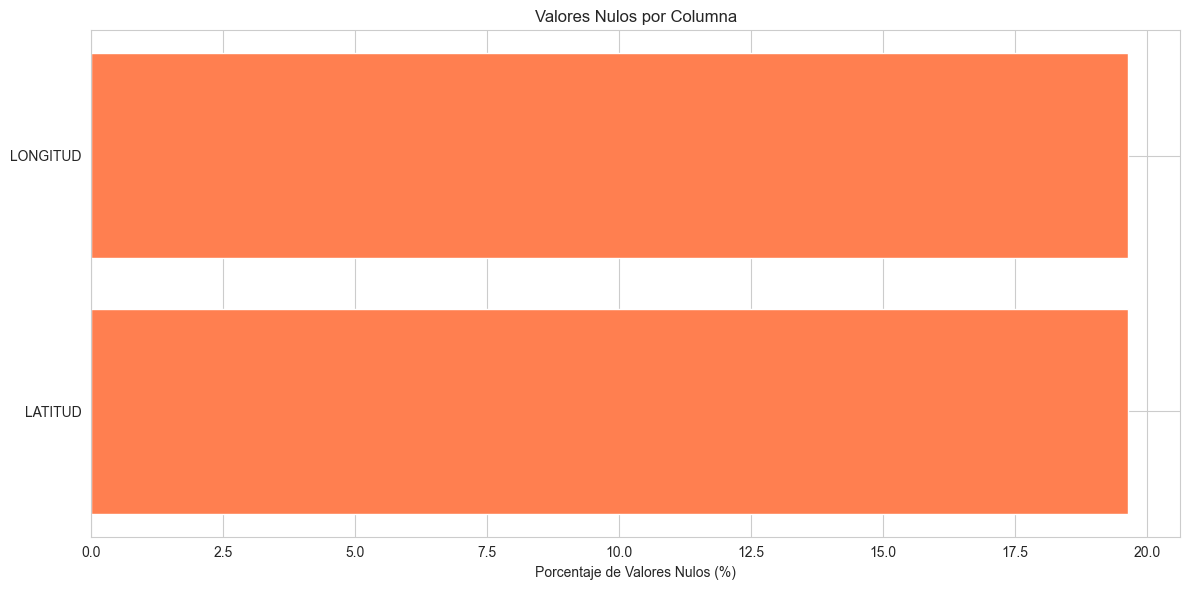


 ANÁLISIS DE DUPLICADOS
Filas duplicadas: 0

 ANÁLISIS DE CATEGORÍAS PRINCIPALES

 Distribución por REGIÓN:
REGIÓN
Lima           831
Cusco          588
Junín          390
Áncash         359
Arequipa       329
Puno           329
Ayacucho       296
La Libertad    248
Huánuco        215
Piura          212
Name: count, dtype: int64

 Distribución por CATEGORÍA:
CATEGORÍA
1. SITIOS NATURALES                                                   1949
2. MANIFESTACIONES CULTURALES                                         1904
3. FOLCLORE                                                            729
5. ACONTECIMIENTOS PROGRAMADOS                                         666
4. REALIZACIONES TÉCNICAS, CIENTÍFICAS Y ARTÍSTICAS CONTEMPORÁNEAS     266
Name: count, dtype: int64


In [8]:
## 2. Análisis Exploratorio Inicial

# %% Información general del dataset
if df is not None:
    print("=" * 80)
    print("INFORMACIÓN GENERAL DEL DATASET")
    print("=" * 80)
    df.info()

# %% Estadísticas descriptivas
if df is not None:
    display(df.describe(include='all'))

# %% [markdown]
# ## 3. Identificación de Problemas de Calidad

# %% Valores nulos por columna
if df is not None:
    print("\n ANÁLISIS DE VALORES NULOS")
    print("=" * 80)
    nulos = df.isnull().sum()
    porcentaje_nulos = (nulos / len(df)) * 100
    resumen_nulos = pd.DataFrame({
        'Columna': nulos.index,
        'Valores Nulos': nulos.values,
        'Porcentaje (%)': porcentaje_nulos.values
    })
    resumen_nulos = resumen_nulos[resumen_nulos['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)
    
    if len(resumen_nulos) > 0:
        print(resumen_nulos.to_string(index=False))
        
        # Visualización de valores nulos
        plt.figure(figsize=(12, 6))
        plt.barh(resumen_nulos['Columna'], resumen_nulos['Porcentaje (%)'], color='coral')
        plt.xlabel('Porcentaje de Valores Nulos (%)')
        plt.title('Valores Nulos por Columna')
        plt.tight_layout()
        plt.show()
    else:
        print(" No hay valores nulos en el dataset")

# %% Valores duplicados
if df is not None:
    print("\n ANÁLISIS DE DUPLICADOS")
    print("=" * 80)
    duplicados = df.duplicated().sum()
    print(f"Filas duplicadas: {duplicados}")
    
    if duplicados > 0:
        print(f"\nPorcentaje de duplicados: {(duplicados/len(df)*100):.2f}%")

# %% Análisis de columnas categóricas principales
if df is not None:
    print("\n ANÁLISIS DE CATEGORÍAS PRINCIPALES")
    print("=" * 80)
    
    # Buscar columnas importantes (pueden tener nombres similares)
    col_names = [col.lower() for col in df.columns]
    
    # Detectar columna de región/departamento
    region_cols = [col for col in df.columns if 'regi' in col.lower() or 'depar' in col.lower()]
    if region_cols:
        print(f"\n Distribución por {region_cols[0]}:")
        print(df[region_cols[0]].value_counts().head(10))
    
    # Detectar columna de categoría
    cat_cols = [col for col in df.columns if 'categ' in col.lower() or 'tipo' in col.lower()]
    if cat_cols:
        print(f"\n Distribución por {cat_cols[0]}:")
        print(df[cat_cols[0]].value_counts().head(10))

In [9]:
## 4. Limpieza de Datos

# %% Crear copia del dataframe para limpieza
if df is not None:
    df_clean = df.copy()
    print(" Copia de seguridad creada")
    
    # %% 4.1 Limpiar nombres de columnas
    df_clean.columns = (df_clean.columns
                       .str.strip()
                       .str.lower()
                       .str.replace(' ', '_')
                       .str.replace('á', 'a')
                       .str.replace('é', 'e')
                       .str.replace('í', 'i')
                       .str.replace('ó', 'o')
                       .str.replace('ú', 'u')
                       .str.replace('ñ', 'n'))
    
    print("\n Nombres de columnas estandarizados:")
    for i, col in enumerate(df_clean.columns, 1):
        print(f"{i}. {col}")

# %% 4.2 Limpiar valores de texto
if df is not None:
    def limpiar_texto(texto):
        if pd.isna(texto):
            return texto
        texto = str(texto).strip()
        # Solo capitalizar si no está todo en mayúsculas (preservar categorías)
        if not texto.isupper():
            texto = texto.title()
        return texto
    
    # Aplicar limpieza a columnas de texto
    columnas_objeto = df_clean.select_dtypes(include=['object']).columns
    
    for col in columnas_objeto:
        # No limpiar URLs
        if 'url' not in col.lower() and 'http' not in col.lower():
            try:
                df_clean[col] = df_clean[col].apply(limpiar_texto)
                print(f" Columna '{col}' limpiada")
            except:
                print(f" No se pudo limpiar '{col}'")

# %% 4.3 Manejar valores nulos
if df is not None:
    print("\n MANEJO DE VALORES NULOS")
    print("=" * 80)
    
    for col in df_clean.columns:
        nulos_antes = df_clean[col].isnull().sum()
        if nulos_antes > 0:
            # Para columnas de texto, rellenar con 'NO ESPECIFICADO'
            if df_clean[col].dtype == 'object':
                if 'url' not in col.lower() and 'fecha' not in col.lower():
                    df_clean[col] = df_clean[col].fillna('NO ESPECIFICADO')
                    print(f" {col}: {nulos_antes} valores nulos → 'NO ESPECIFICADO'")

# %% 4.4 Eliminar duplicados
if df is not None:
    registros_antes = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    duplicados_eliminados = registros_antes - len(df_clean)
    print(f"\n Duplicados eliminados: {duplicados_eliminados}")

# %% 4.5 Crear nuevas columnas útiles
if df is not None:
    print("\n CREACIÓN DE NUEVAS COLUMNAS")
    print("=" * 80)
    
    # ID único
    df_clean['id_recurso'] = range(1, len(df_clean) + 1)
    print(" Columna 'id_recurso' creada")
    
    # Verificar coordenadas si existen
    coord_cols = [col for col in df_clean.columns if 'lat' in col.lower() or 'long' in col.lower()]
    if len(coord_cols) >= 2:
        lat_col = [c for c in coord_cols if 'lat' in c.lower()][0]
        lon_col = [c for c in coord_cols if 'lon' in c.lower()][0]
        
        df_clean[lat_col] = pd.to_numeric(df_clean[lat_col], errors='coerce')
        df_clean[lon_col] = pd.to_numeric(df_clean[lon_col], errors='coerce')
        
        df_clean['tiene_coordenadas'] = (~df_clean[lat_col].isna()) & (~df_clean[lon_col].isna())
        print(f" Recursos con coordenadas: {df_clean['tiene_coordenadas'].sum()}")

# %% [markdown]
# ## 5. Análisis Post-Limpieza y Visualizaciones

# %% Resumen comparativo
if df is not None:
    print("\n" + "=" * 80)
    print("COMPARACIÓN: ANTES vs DESPUÉS DE LA LIMPIEZA")
    print("=" * 80)
    
    comparacion = pd.DataFrame({
        'Métrica': ['Filas totales', 'Columnas', 'Valores nulos totales', 'Duplicados'],
        'Antes': [
            len(df),
            len(df.columns),
            df.isnull().sum().sum(),
            df.duplicated().sum()
        ],
        'Después': [
            len(df_clean),
            len(df_clean.columns),
            df_clean.isnull().sum().sum(),
            0
        ]
    })
    print(comparacion.to_string(index=False))

 Copia de seguridad creada

 Nombres de columnas estandarizados:
1. region
2. provincia
3. distrito
4. codigo_del_recurso
5. nombre_del_recurso
6. categoria
7. tipo_de_categoria
8. sub_tipo_categoria
9. url
10. latitud
11. longitud
12. fecha_de_corte
 Columna 'region' limpiada
 Columna 'provincia' limpiada
 Columna 'distrito' limpiada
 Columna 'nombre_del_recurso' limpiada
 Columna 'categoria' limpiada
 Columna 'tipo_de_categoria' limpiada
 Columna 'sub_tipo_categoria' limpiada

 MANEJO DE VALORES NULOS

 Duplicados eliminados: 0

 CREACIÓN DE NUEVAS COLUMNAS
 Columna 'id_recurso' creada
 Recursos con coordenadas: 4431

COMPARACIÓN: ANTES vs DESPUÉS DE LA LIMPIEZA
              Métrica  Antes  Después
        Filas totales   5514     5514
             Columnas     12       14
Valores nulos totales   2166     2166
           Duplicados      0        0


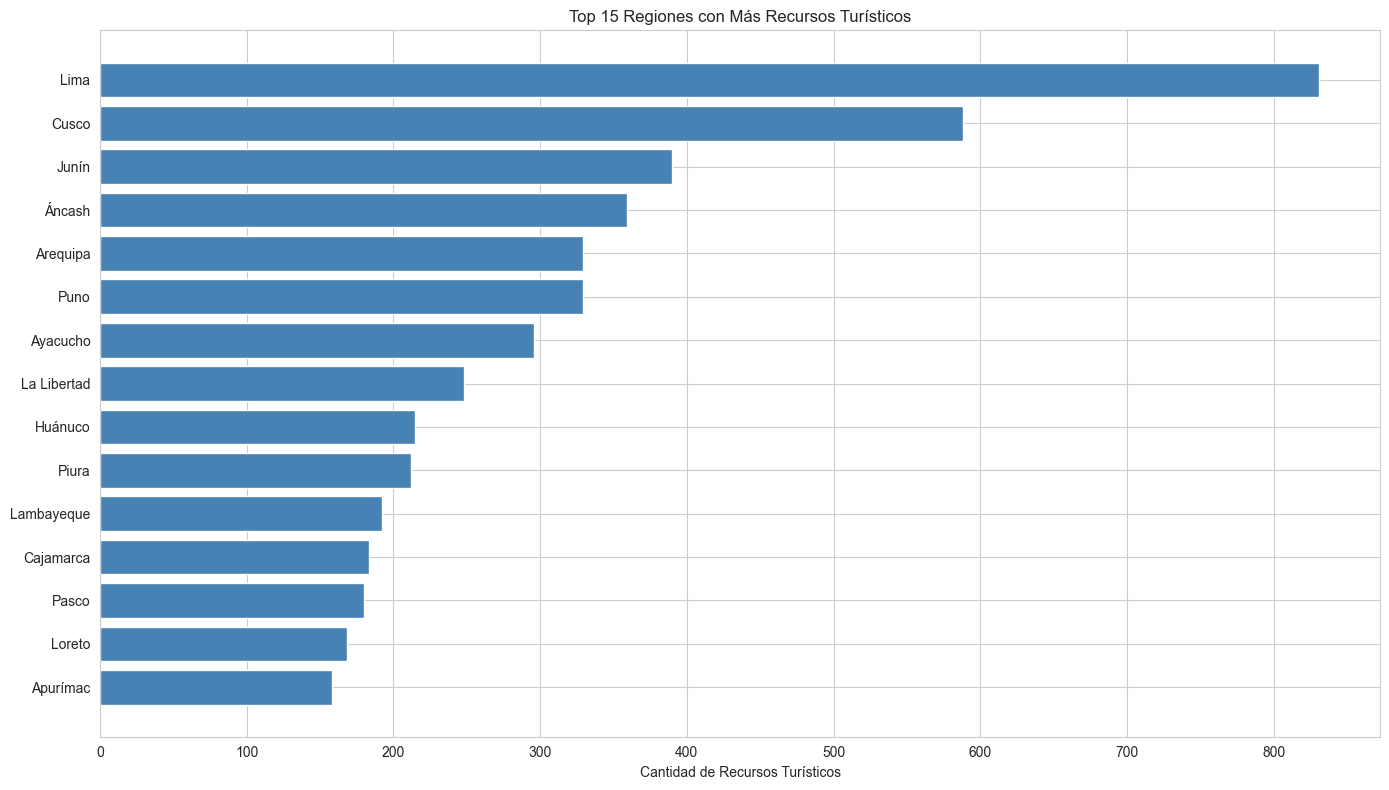


 Datos limpios guardados en: ../data/cleaned/inventario_recursos_turisticos_limpio.csv
 Total de registros exportados: 5514
 Datos también exportados a Excel: ../data/cleaned/inventario_recursos_turisticos_limpio.xlsx

RESUMEN DEL PROCESO DE LIMPIEZA DE DATOS

Fecha: 2025-12-22 20:32:17
Fuente: MINCETUR - Inventario Nacional de Recursos Turísticos

CONFIGURACIÓN DE CARGA:
- Encoding: latin-1
- Delimitador: ';'

DATOS ORIGINALES:
- Registros: 5,514
- Columnas: 12
- Valores nulos: 2,166

DATOS LIMPIOS:
- Registros: 5,514
- Columnas: 14
- Valores nulos: 2,166

 Listo para análisis en Power BI y Looker Studio


 Proceso completado exitosamente!


In [11]:
# %% Visualizaciones finales
if df is not None:
    # Encontrar columna de región
    region_col = [col for col in df_clean.columns if 'regi' in col.lower() or 'depar' in col.lower()]
    
    if region_col:
        region_col = region_col[0]
        
        # Top 15 regiones
        plt.figure(figsize=(14, 8))
        top_regiones = df_clean[region_col].value_counts().head(15)
        plt.barh(range(len(top_regiones)), top_regiones.values, color='steelblue')
        plt.yticks(range(len(top_regiones)), top_regiones.index)
        plt.xlabel('Cantidad de Recursos Turísticos')
        plt.title('Top 15 Regiones con Más Recursos Turísticos')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

# %% [markdown]
# ## 6. Exportar Datos Limpios

# %% Guardar datos limpios
if df is not None:
    # Crear directorio si no existe
    import os
    os.makedirs('../data/cleaned', exist_ok=True)
    
    # Guardar CSV
    output_path = '../data/cleaned/inventario_recursos_turisticos_limpio.csv'
    df_clean.to_csv(output_path, index=False, encoding='utf-8-sig')
    print(f"\n Datos limpios guardados en: {output_path}")
    print(f" Total de registros exportados: {len(df_clean)}")
    
    # Guardar Excel
    output_excel = '../data/cleaned/inventario_recursos_turisticos_limpio.xlsx'
    try:
        df_clean.to_excel(output_excel, index=False, engine='openpyxl')
        print(f" Datos también exportados a Excel: {output_excel}")
    except:
        print(" No se pudo exportar a Excel (instala openpyxl)")
    
    # Resumen
    resumen = f"""
{'=' * 80}
RESUMEN DEL PROCESO DE LIMPIEZA DE DATOS
{'=' * 80}

Fecha: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Fuente: MINCETUR - Inventario Nacional de Recursos Turísticos

CONFIGURACIÓN DE CARGA:
- Encoding: {successful_config['encoding'] if successful_config else 'N/A'}
- Delimitador: '{successful_config['delimiter'] if successful_config else 'N/A'}'

DATOS ORIGINALES:
- Registros: {len(df):,}
- Columnas: {len(df.columns)}
- Valores nulos: {df.isnull().sum().sum():,}

DATOS LIMPIOS:
- Registros: {len(df_clean):,}
- Columnas: {len(df_clean.columns)}
- Valores nulos: {df_clean.isnull().sum().sum():,}

 Listo para análisis en Power BI y Looker Studio
{'=' * 80}
"""
    
    print(resumen)
    
    with open('../data/cleaned/resumen_limpieza.txt', 'w', encoding='utf-8') as f:
        f.write(resumen)
    
    print("\n Proceso completado exitosamente!")